{'Bernoulli': <Figure size 1200x400 with 1 Axes>,
 'Binomial': <Figure size 1200x400 with 1 Axes>,
 'Geometric': <Figure size 1200x400 with 1 Axes>,
 'Hypergeometric': <Figure size 1200x400 with 1 Axes>,
 'Poisson': <Figure size 1200x400 with 1 Axes>,
 'Exponential': <Figure size 1200x400 with 1 Axes>,
 'Uniform': <Figure size 1200x400 with 1 Axes>}

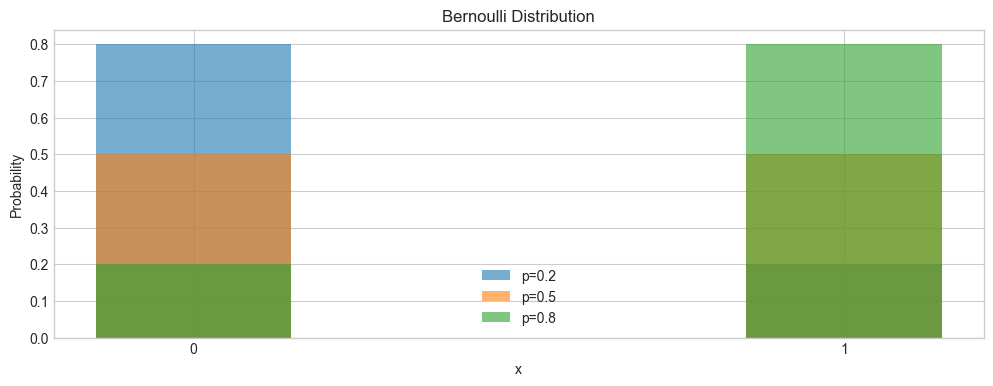

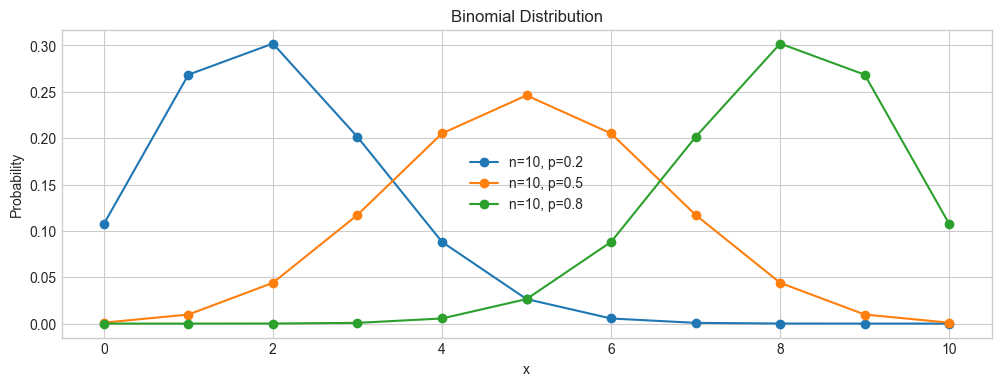

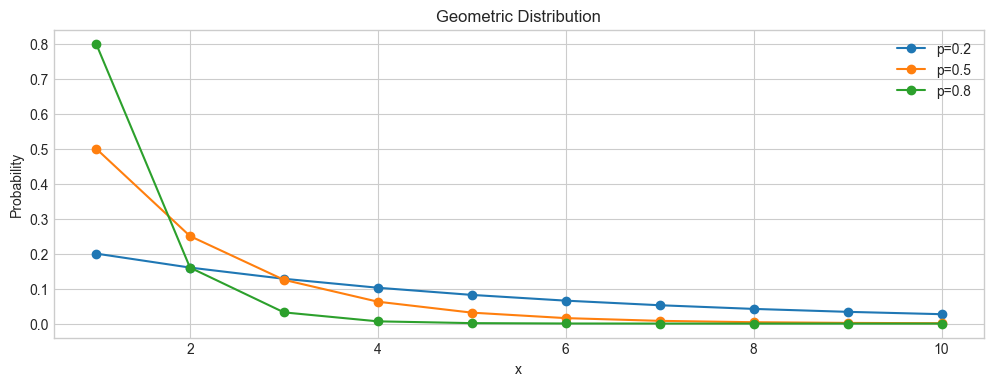

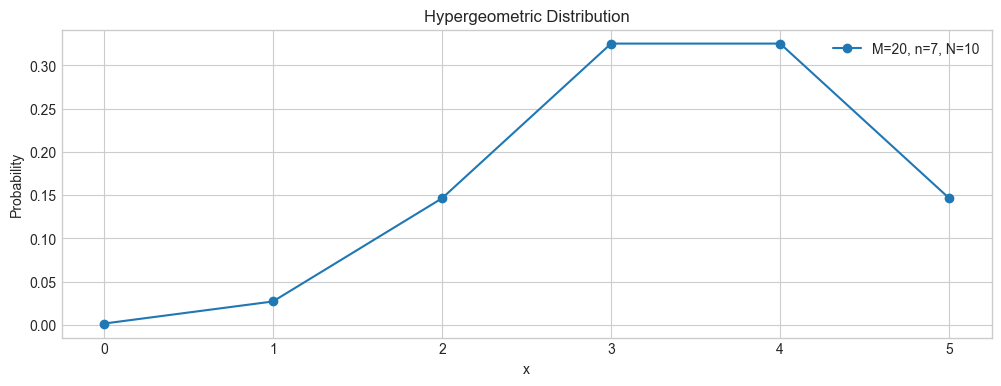

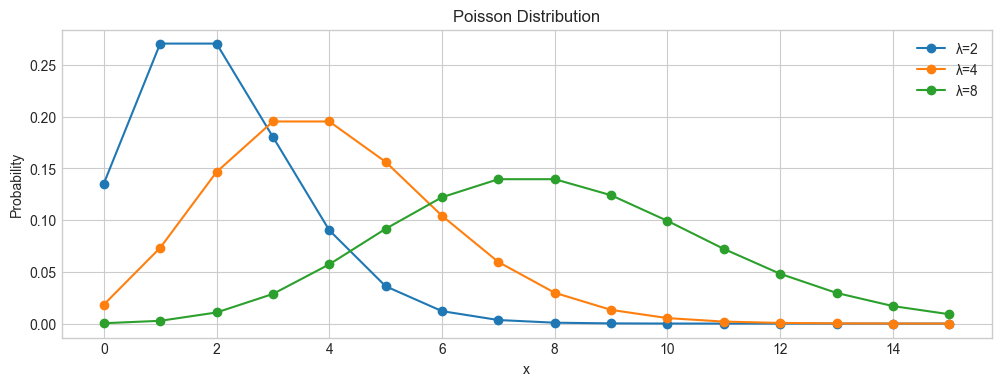

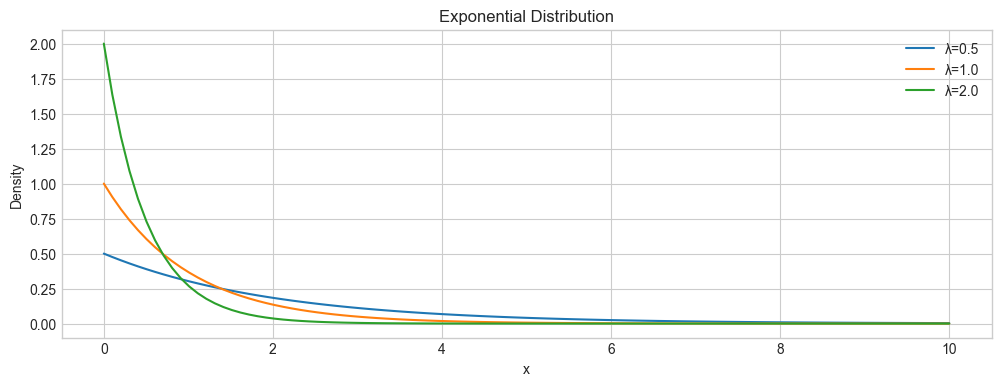

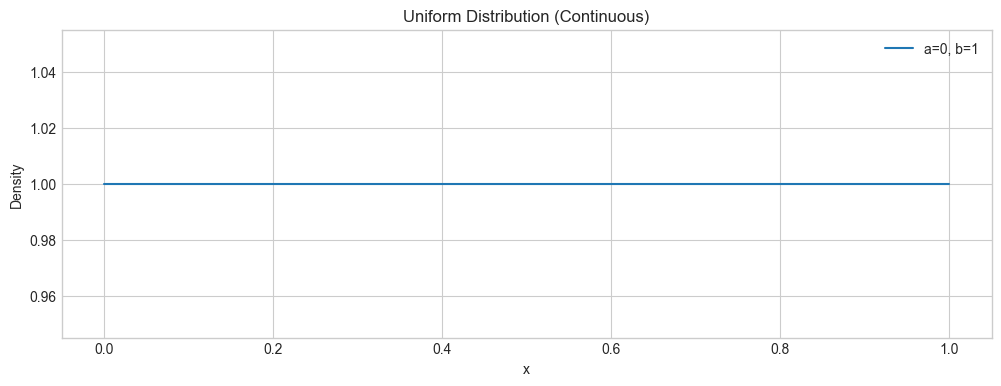

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson, expon, uniform

# Plot settings
plt.style.use("seaborn-v0_8-whitegrid")
figsize = (12, 4)

# Generate and store figures for each distribution
figures = {}

# 1. Bernoulli
x_ber = [0, 1]
params_ber = [0.2, 0.5, 0.8]
fig, ax = plt.subplots(figsize=figsize)
for p in params_ber:
    ax.bar(x_ber, bernoulli.pmf(x_ber, p), alpha=0.6, label=f'p={p}', width=0.3,)
ax.set_title("Bernoulli Distribution")
ax.set_xticks(x_ber)
ax.set_xlabel("x")
ax.set_ylabel("Probability")
ax.legend()
figures["Bernoulli"] = fig

# 2. Binomial
x_bin = np.arange(0, 11)
params_bin = [(10, 0.2), (10, 0.5), (10, 0.8)]
fig, ax = plt.subplots(figsize=figsize)
for n, p in params_bin:
    ax.plot(x_bin, binom.pmf(x_bin, n, p), marker='o', label=f'n={n}, p={p}')
ax.set_title("Binomial Distribution")
ax.set_xlabel("x")
ax.set_ylabel("Probability")
ax.legend()
figures["Binomial"] = fig

# 3. Geometric
x_geo = np.arange(1, 11)
params_geo = [0.2, 0.5, 0.8]
fig, ax = plt.subplots(figsize=figsize)
for p in params_geo:
    ax.plot(x_geo, geom.pmf(x_geo, p), marker='o', label=f'p={p}')
ax.set_title("Geometric Distribution")
ax.set_xlabel("x")
ax.set_ylabel("Probability")
ax.legend()
figures["Geometric"] = fig

# 4. Hypergeometric
x_hyper = np.arange(0, 6)
M, n, N = 20, 7, 10
fig, ax = plt.subplots(figsize=figsize)
ax.plot(x_hyper, hypergeom.pmf(x_hyper, M, n, N), marker='o', label=f'M={M}, n={n}, N={N}')
ax.set_title("Hypergeometric Distribution")
ax.set_xlabel("x")
ax.set_ylabel("Probability")
ax.legend()
figures["Hypergeometric"] = fig

# 5. Poisson
x_pois = np.arange(0, 16)
params_pois = [2, 4, 8]
fig, ax = plt.subplots(figsize=figsize)
for mu in params_pois:
    ax.plot(x_pois, poisson.pmf(x_pois, mu), marker='o', label=f'λ={mu}')
ax.set_title("Poisson Distribution")
ax.set_xlabel("x")
ax.set_ylabel("Probability")
ax.legend()
figures["Poisson"] = fig

# 6. Exponential
x_exp = np.linspace(0, 10, 100)
params_exp = [0.5, 1.0, 2.0]
fig, ax = plt.subplots(figsize=figsize)
for l in params_exp:
    ax.plot(x_exp, expon.pdf(x_exp, scale=1/l), label=f'λ={l}')
ax.set_title("Exponential Distribution")
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.legend()
figures["Exponential"] = fig

# 7. Uniform
x_uni = np.linspace(0, 1, 100)
a, b = 0, 1
fig, ax = plt.subplots(figsize=figsize)
ax.plot(x_uni, uniform.pdf(x_uni, a, b-a), label='a=0, b=1')
ax.set_title("Uniform Distribution (Continuous)")
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.legend()
figures["Uniform"] = fig

figures


In [3]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, "Übungsblatt: Wahrscheinlichkeitsverteilungen", ln=True, align="C")
        self.ln(5)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, ln=True, align="L")
        self.ln(2)

    def chapter_body(self, body):
        self.set_font("Arial", "", 11)
        self.multi_cell(0, 8, body)
        self.ln()

    def add_question(self, title, body):
        self.chapter_title(title)
        self.chapter_body(body)

pdf = PDF()
pdf.add_page()

questions = [
    ("1. Bernoulli-Verteilung", 
     "Ein Computerprogramm liefert bei jedem Start entweder Fehler (1) oder kein Fehler (0) mit einer Wahrscheinlichkeit von 0.3 für einen Fehler.\n"
     "- Skizziere die Verteilung.\n"
     "- Welche Balkenhöhen zeichnest du bei X = 0 und X = 1?\n"
     "- Ist diese Verteilung diskret oder stetig?\n"),

    ("2. Binomialverteilung", 
     "Ein Schüler hat bei jeder Multiple-Choice-Frage eine Wahrscheinlichkeit von 0.5, die richtige Antwort zu raten. Es werden 4 Fragen gestellt.\n"
     "- Welche Werte kann X annehmen?\n"
     "- Wo liegt der Erwartungswert? (Nur abschätzen)\n"
     "- Skizziere die Verteilung (Balkendiagramm).\n"),

    ("3. Geometrische Verteilung", 
     "Ein Angler hat pro Wurf eine Erfolgswahrscheinlichkeit von 0.25, einen Fisch zu fangen.\n"
     "- Wie sieht der typische Verlauf der Wahrscheinlichkeiten aus?\n"
     "- Wie groß ist die Wahrscheinlichkeit, den ersten Fisch beim 2. Versuch zu fangen?\n"
     "- Skizziere den typischen Verlauf der Wahrscheinlichkeiten.\n"),

    ("4. Hypergeometrische Verteilung", 
     "In einem Beutel befinden sich 5 rote und 5 blaue Kugeln. Du ziehst 3 Kugeln ohne Zurücklegen.\n"
     "- Welche Werte kann X (Anzahl roter Kugeln) annehmen?\n"
     "- Schätze ab, bei welchem Wert von X die Wahrscheinlichkeit am höchsten ist.\n"
     "- Ist dies ein diskretes oder stetiges Modell?\n"),

    ("5. Poisson-Verteilung", 
     "In einer Bibliothek treten im Schnitt 3 Druckerprobleme pro Woche auf.\n"
     "- Wie groß ist ungefähr die Wahrscheinlichkeit für genau 0 Fehler in einer Woche?\n"
     "- Skizziere die Form der Verteilung (x = 0 bis 6).\n"
     "- Welche Form nimmt die Verteilung an, wenn der Mittelwert auf 6 steigt?\n"),

    ("6. Exponentialverteilung", 
     "Die Wartezeit bis zum nächsten Kunden beträgt im Mittel 10 Minuten.\n"
     "- Wie sieht die Wahrscheinlichkeitsdichte aus?\n"
     "- Zeichne den Verlauf der Dichtefunktion.\n"
     "- Ist die Verteilung diskret oder stetig?\n"),

    ("7. Gleichverteilung (stetig)", 
     "Eine Zufallszahl wird gleichverteilt zwischen 0 und 4 gewählt.\n"
     "- Zeichne die Dichtefunktion.\n"
     "- Wie hoch ist die Dichte?\n"
     "- Welche Wahrscheinlichkeit hat ein Wert zwischen 1 und 2?\n")
]

for title, body in questions:
    pdf.add_question(title, body)

pdf_path = "Übungsblatt_Wahrscheinlichkeitsverteilungen.pdf"
pdf.output(pdf_path)
pdf_path


'Übungsblatt_Wahrscheinlichkeitsverteilungen.pdf'

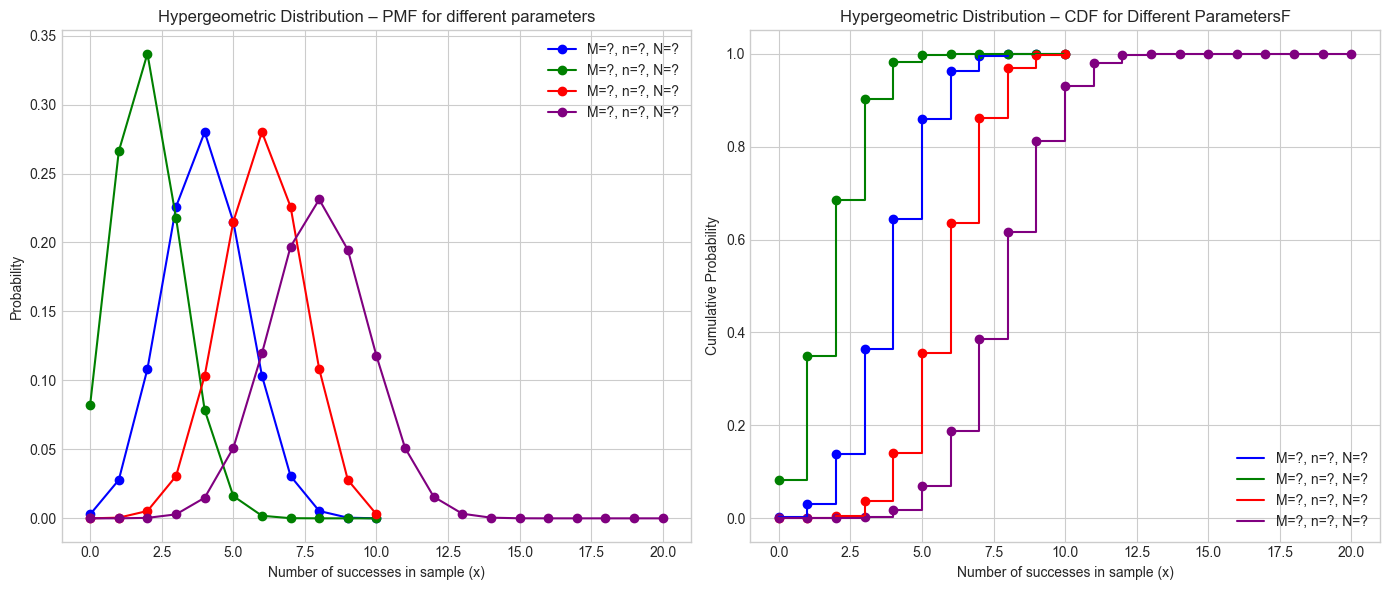

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import hypergeom

# Function to plot multiple hypergeometric distributions
def plot_hypergeometric_variants():

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Define different parameter sets: (M, n, N)
    params = [
        (50, 20, 10),  # moderate success rate
        (50, 10, 10),  # low success rate
        (50, 30, 10),  # high success rate
        (50, 20, 20),  # larger sample size
    ]

    colors = ['blue', 'green', 'red', 'purple']

    for i, (M, n, N) in enumerate(params):
        # Range of x-values for this distribution
        x = np.arange(0, min(n, N) + 1)
        rv = hypergeom(M, n, N)
        pmf = rv.pmf(x)
        cdf = rv.cdf(x)

        #label = f"M={M}, n={n}, N={N}"
        label = f"M=?, n=?, N=?"


        #---- PDF
        axes[0].plot(x, pmf, 'o-', label=label, color=colors[i])
        
        # Compute mean and variance
        mean = rv.mean()
        var = rv.var()

        # Annotate mean and variance
        # axes[0].annotate(
        #     f"μ={mean:.2f}, σ²={var:.2f}",
        #     xy=(x[-1], pmf[-1]),
        #     xytext=(10, -10 + 12 * i),
        #     textcoords='offset points',
        #     fontsize=9,
        #     color=colors[i]
        # )

        axes[1].step(x, cdf, where='post', label=label, color=colors[i])
        axes[1].scatter(x, cdf, color=colors[i])


    # PMF plot settings
    axes[0].set_title("Hypergeometric Distribution – PMF for different parameters")
    axes[0].set_xlabel("Number of successes in sample (x)")
    axes[0].set_ylabel("Probability")
    axes[0].grid(True)
    axes[0].legend()

    # CDF plot settings
    axes[1].set_title("Hypergeometric Distribution – CDF for Different ParametersF")
    axes[1].set_xlabel("Number of successes in sample (x)")
    axes[1].set_ylabel("Cumulative Probability")
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.savefig('506_q_hypergeometric_params.png', bbox_inches='tight')

    plt.show()

# Run the plot
plot_hypergeometric_variants()


/var/folders/3f/rzsssffx40d3nh7vkb595jzh0000gq/T/ipykernel_96025/2318264964.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/var/folders/3f/rzsssffx40d3nh7vkb595jzh0000gq/T/ipykernel_96025/2318264964.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


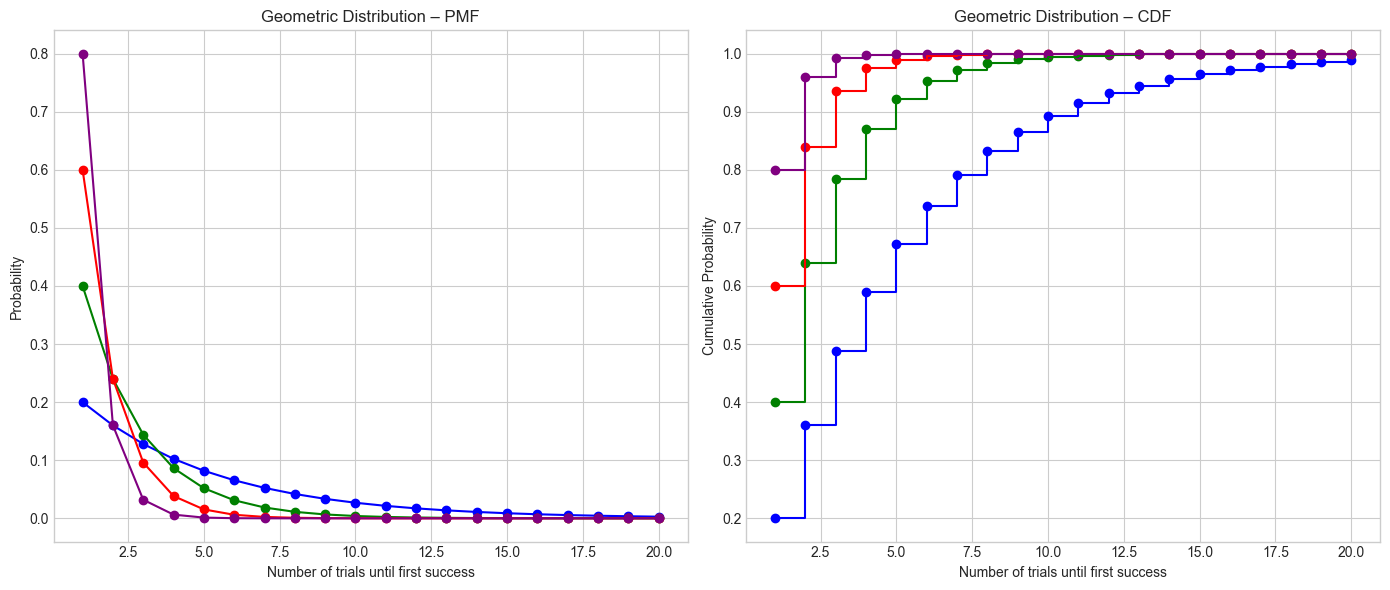

In [67]:
# Re-import required libraries after code execution environment reset
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import geom

# Function to plot both PMF and CDF for the geometric distribution
def plot_geometric_distribution():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Define different probabilities of success
    ps = [0.2, 0.4, 0.6, 0.8]
    colors = ['blue', 'green', 'red', 'purple']

    x = np.arange(1, 21)

    for i, p in enumerate(ps):
        rv = geom(p)
        pmf = rv.pmf(x)
        cdf = rv.cdf(x)
        mean = rv.mean()
        var = rv.var()

        # PMF
        axes[0].plot(x, pmf, 'o-', color=colors[i])#, label=f"p={p}")
        # axes[0].annotate(
        #     f"μ={mean:.2f}, σ²={var:.2f}",
        #     xy=(x[-1], pmf[-1]),
        #     xytext=(10, -10 + 12 * i),
        #     textcoords='offset points',
        #     fontsize=9,
        #     color=colors[i]
        # )

        # CDF
        axes[1].step(x, cdf, where='post', color=colors[i],)# label=f"p={p}")
        axes[1].scatter(x, cdf, color=colors[i])
        # axes[1].annotate(
        #     f"μ={mean:.2f}, σ²={var:.2f}",
        #     xy=(x[-1], cdf[-1]),
        #     xytext=(10, -10 + 12 * i),
        #     textcoords='offset points',
        #     fontsize=9,
        #     color=colors[i]
        # )

    # PMF plot settings
    axes[0].set_title("Geometric Distribution – PMF")
    axes[0].set_xlabel("Number of trials until first success")
    axes[0].set_ylabel("Probability")
    axes[0].grid(True)
    axes[0].legend()

    # CDF plot settings
    axes[1].set_title("Geometric Distribution – CDF")
    axes[1].set_xlabel("Number of trials until first success")
    axes[1].set_ylabel("Cumulative Probability")
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    #plt.savefig('506_a_geometric_params.png', bbox_inches='tight')
    plt.savefig('506_q_geometric_params.png', bbox_inches='tight')

    plt.show()

# Generate the plots
plot_geometric_distribution()


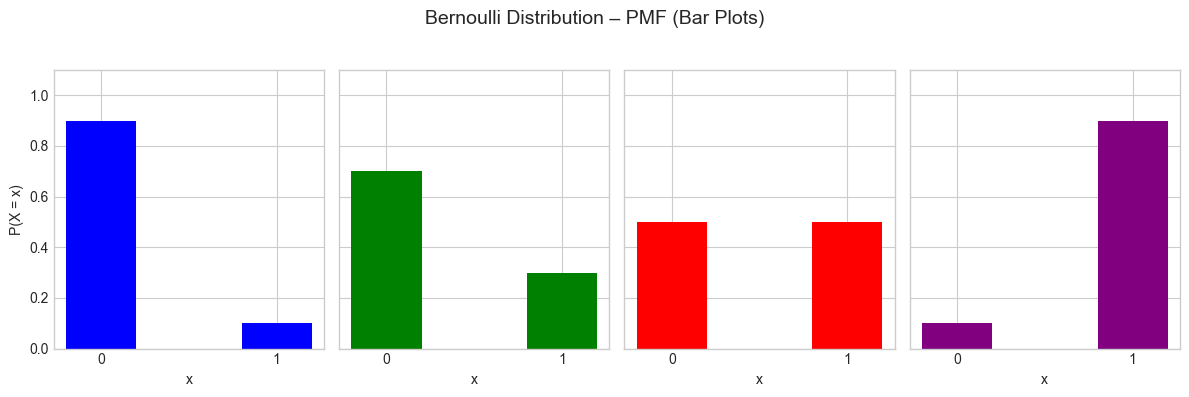

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

# Define different probabilities
ps = [0.1, 0.3, 0.5, 0.9]
colors = ['blue', 'green', 'red', 'purple']

# Set up the figure
fig, axs = plt.subplots(1, len(ps), figsize=(12, 4), sharey=True)

# Plot each Bernoulli distribution
for i, p in enumerate(ps):
    x = [0, 1]
    pmf = bernoulli.pmf(x, p)
    mean = bernoulli.mean(p)
    var = bernoulli.var(p)
    
    axs[i].bar(x, pmf, color=colors[i], width=0.4)
    #axs[i].set_title(f"p = {p}")
    axs[i].set_xticks(x)
    axs[i].set_ylim(0, 1.1)
    # axs[i].text(0.5, 0.9, f"μ = {mean:.2f}\nσ² = {var:.2f}", 
    #             ha='center', fontsize=9)
    axs[i].set_xlabel("x")
    if i == 0:
        axs[i].set_ylabel("P(X = x)")

plt.suptitle("Bernoulli Distribution – PMF (Bar Plots)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('506_q_bernoulli_params.png', bbox_inches='tight')
plt.show()


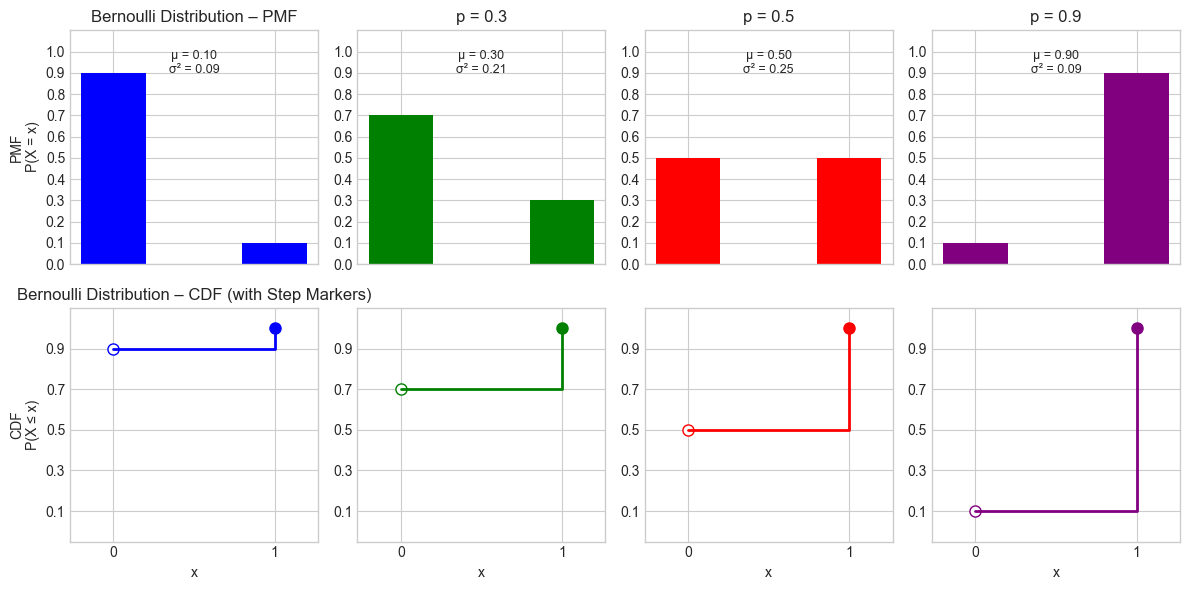

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

# Define different probabilities
ps = [0.1, 0.3, 0.5, 0.9]
colors = ['blue', 'green', 'red', 'purple']

# Set up the figure with 2 rows: PMF and CDF
fig, axs = plt.subplots(2, len(ps), figsize=(12, 6), sharex='col')

x_vals = [0, 1]

for i, p in enumerate(ps):
    rv = bernoulli(p)
    pmf = rv.pmf(x_vals)
    cdf = rv.cdf(x_vals)
    mean = rv.mean()
    var = rv.var()
    
    # PMF Plot
    axs[0, i].bar(x_vals, pmf, color=colors[i], width=0.4)
    axs[0, i].set_title(f"p = {p}")
    axs[0, i].set_xticks(x_vals)
    axs[0, i].set_ylim(0, 1.1)
    axs[0, i].text(0.5, 0.9, f"μ = {mean:.2f}\nσ² = {var:.2f}", 
                   ha='center', fontsize=9)
    if i == 0:
        axs[0, i].set_ylabel("PMF\nP(X = x)")

    # CDF Plot with open/filled markers
    for x in x_vals:
        val = rv.cdf(x)
        if x == 0:
            axs[1, i].plot(x, val, marker='o', markerfacecolor='white',
                           markeredgecolor=colors[i], markersize=8)
        else:
            axs[1, i].plot(x, val, marker='o', color=colors[i], markersize=8)

    axs[1, i].step(x_vals, cdf, where='post', color=colors[i], linewidth=2)
    axs[1, i].set_xticks(x_vals)
    axs[1, i].set_ylim(-0.05, 1.1)
    axs[1, i].set_xlabel("x")
    axs[1, i].set_yticks(np.arange(0.1, 1.1, 0.2))
    axs[0, i].set_yticks(np.arange(0, 1.1, 0.1))


    if i == 0:
        axs[1, i].set_ylabel("CDF\nP(X ≤ x)")

# Add titles
axs[0, 0].set_title("Bernoulli Distribution – PMF")
axs[1, 0].set_title("Bernoulli Distribution – CDF (with Step Markers)")

plt.tight_layout()
plt.savefig('506_a_bernoulli_params.png', bbox_inches='tight')

plt.show()


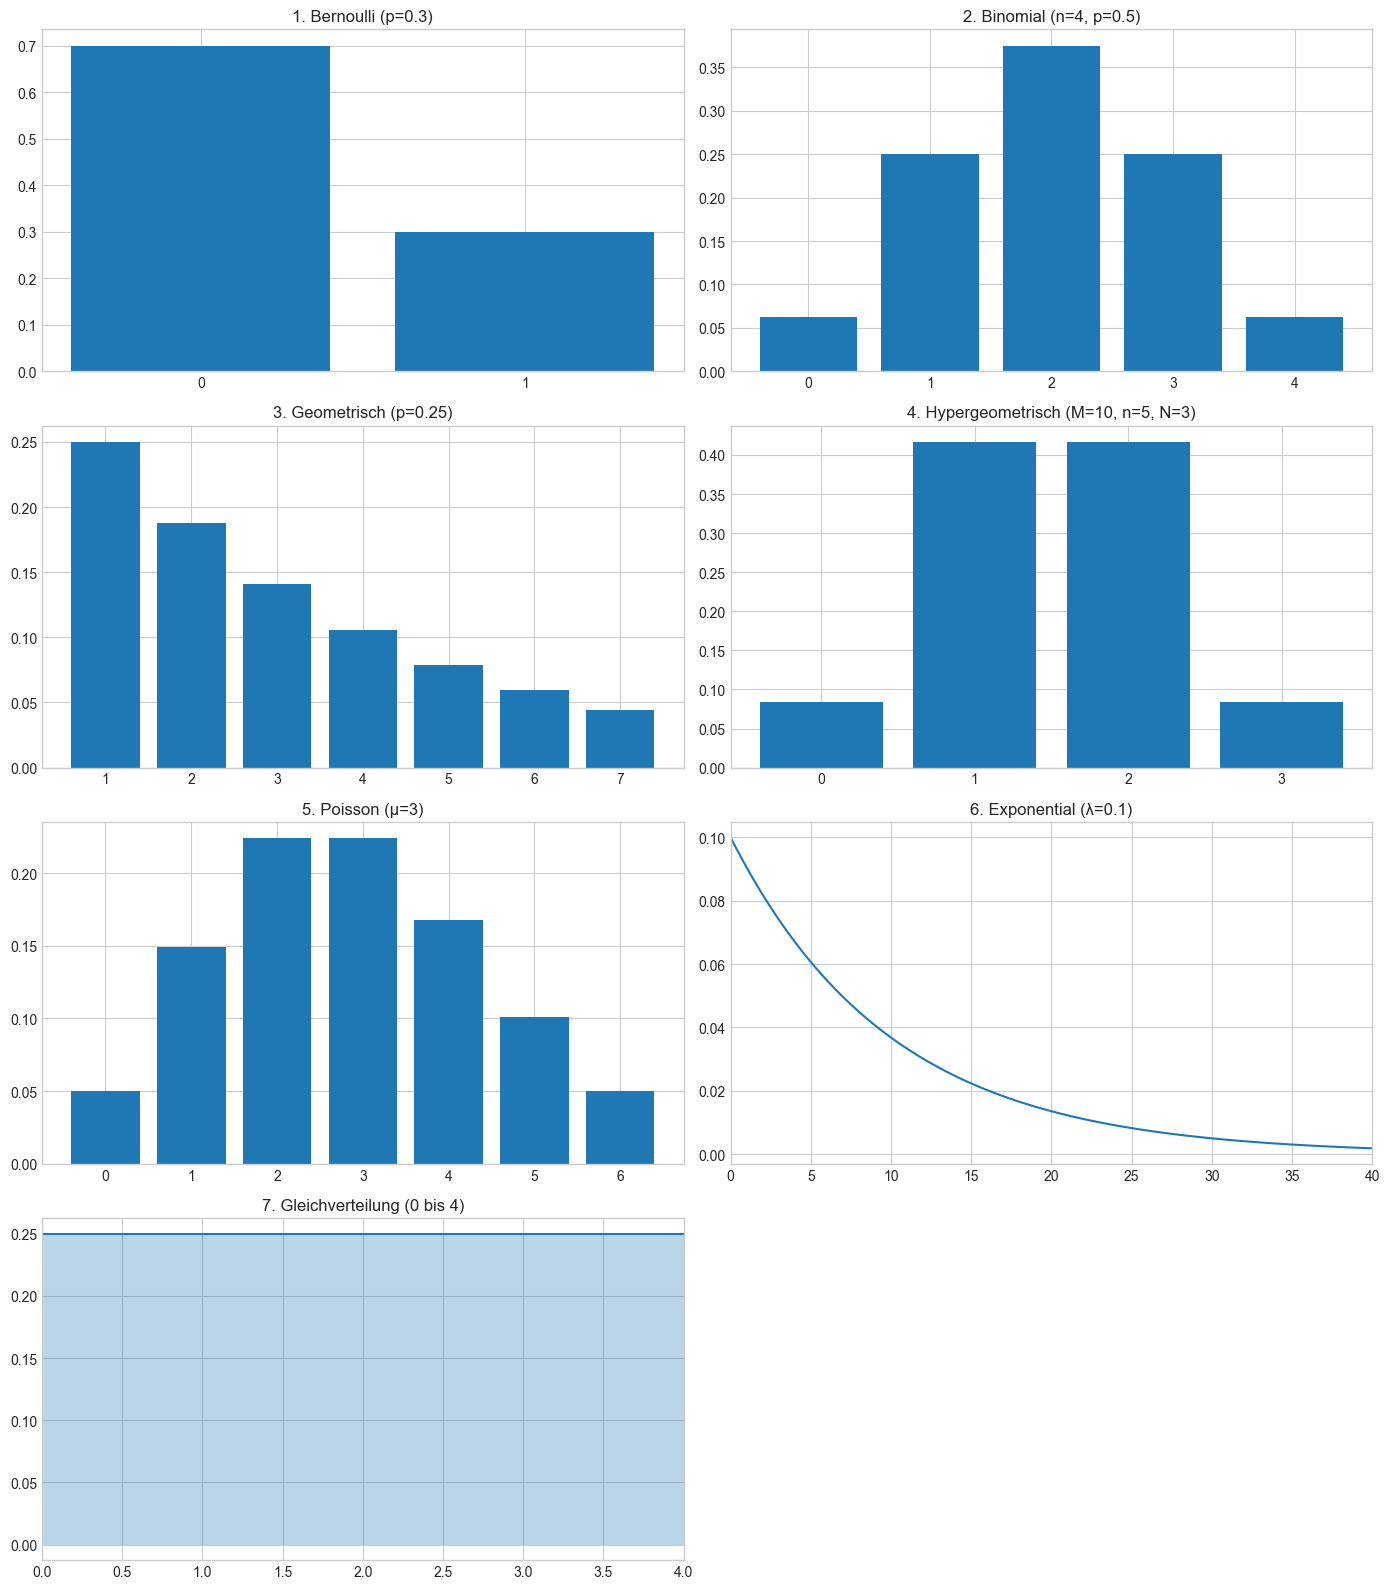

In [56]:
# Re-import necessary modules after kernel reset
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson, expon, uniform

def plot_all_distributions():
    fig, axs = plt.subplots(4, 2, figsize=(14, 16))
    axs = axs.flatten()

    # 1. Bernoulli Distribution (p = 0.3)
    x = [0, 1]
    p = 0.3
    axs[0].bar(x, bernoulli.pmf(x, p))
    axs[0].set_title("1. Bernoulli (p=0.3)")
    axs[0].set_xticks(x)

    # 2. Binomial Distribution (n=4, p=0.5)
    x = np.arange(0, 5)
    axs[1].bar(x, binom.pmf(x, 4, 0.5))
    axs[1].set_title("2. Binomial (n=4, p=0.5)")
    axs[1].set_xticks(x)

    # 3. Geometric Distribution (p=0.25)
    x = np.arange(1, 8)
    axs[2].bar(x, geom.pmf(x, 0.25))
    axs[2].set_title("3. Geometrisch (p=0.25)")
    axs[2].set_xticks(x)

    # 4. Hypergeometric (M=10, n=5 red, N=3 draws)
    M, n, N = 10, 5, 3
    x = np.arange(0, N+1)
    axs[3].bar(x, hypergeom.pmf(x, M, n, N))
    axs[3].set_title("4. Hypergeometrisch (M=10, n=5, N=3)")
    axs[3].set_xticks(x)

    # 5. Poisson Distribution (mu=3)
    mu = 3
    x = np.arange(0, 7)
    axs[4].bar(x, poisson.pmf(x, mu))
    axs[4].set_title("5. Poisson (μ=3)")
    axs[4].set_xticks(x)

    # 6. Exponential Distribution (mean=10)
    x = np.linspace(0, 40, 200)
    lam = 1 / 10
    axs[5].plot(x, expon.pdf(x, scale=1/lam))
    axs[5].set_title("6. Exponential (λ=0.1)")
    axs[5].set_xlim(0, 40)

    # 7. Uniform Distribution (0, 4)
    x = np.linspace(0, 4, 100)
    axs[6].plot(x, uniform.pdf(x, loc=0, scale=4))
    axs[6].fill_between(x, uniform.pdf(x, loc=0, scale=4), alpha=0.3)
    axs[6].set_title("7. Gleichverteilung (0 bis 4)")
    axs[6].set_xlim(0, 4)

    # Hide unused subplot
    axs[7].axis('off')

    for ax in axs[:7]:
        ax.grid(True)

    plt.tight_layout()
    plt.show()

plot_all_distributions()


In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson, expon, uniform

def plot_all_distributions_and_save():
    # 1. Bernoulli Distribution (p = 0.3)
    x = [0, 1]
    p = 0.3
    plt.figure()
    plt.bar(x, bernoulli.pmf(x, p))
    plt.title("Bernoulli (p=0.3)")
    plt.xticks(x)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("506_a_bernoulli.png")
    plt.close()

    # 2. Binomial Distribution (n=4, p=0.5)
    x = np.arange(0, 5)
    plt.figure()
    plt.bar(x, binom.pmf(x, 4, 0.5))
    plt.title("Binomial (n=4, p=0.5)")
    plt.xticks(x)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("506_a_binomial.png")
    plt.close()

    # 3. Geometric Distribution (p=0.25)
    x = np.arange(1, 8)
    plt.figure()
    plt.bar(x, geom.pmf(x, 0.25))
    plt.title("Geometrisch (p=0.25)")
    plt.xticks(x)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("506_a_geometrisch.png")
    plt.close()

    # 4. Hypergeometric (M=10, n=5 red, N=3 draws)
    M, n, N = 10, 5, 3
    x = np.arange(0, N + 1)
    plt.figure()
    plt.bar(x, hypergeom.pmf(x, M, n, N))
    plt.title("Hypergeometrisch (M=10, n=5, N=3)")
    plt.xticks(x)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("506_a_hypergeometrisch.png")
    plt.close()

    # 5. Poisson Distribution (mu=3)
    mu = 3
    x = np.arange(0, 7)
    plt.figure()
    plt.bar(x, poisson.pmf(x, mu))
    plt.title("Poisson (λ=3)")
    plt.xticks(x)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("506_a_poisson.png")
    plt.close()

    # 6. Exponential Distribution (mean=10)
    x = np.linspace(0, 40, 200)
    lam = 1 / 10
    plt.figure()
    plt.plot(x, expon.pdf(x, scale=1 / lam))
    plt.title("Exponential (λ=0.1)")
    plt.xlim(0, 40)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("506_a_exponential.png")
    plt.close()

    # 7. Uniform Distribution (0, 4)
    x = np.linspace(0, 4, 100)
    plt.figure()
    plt.plot(x, uniform.pdf(x, loc=0, scale=4))
    plt.fill_between(x, uniform.pdf(x, loc=0, scale=4), alpha=0.3)
    plt.title("Gleichverteilung (0 bis 4)")
    plt.xlim(0, 4)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("506_a_gleichverteilung.png")
    plt.close()

plot_all_distributions_and_save()
